# Yale_face_data

# import package

In [9]:
# import package
# warning
import warnings
warnings.filterwarnings("ignore")
# data
from scipy.io import loadmat
import numpy as np
import pandas as pd
# visulaize
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# adjust data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
# PCA
from sklearn.decomposition import PCA
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay

# import function

In [2]:
# import ML_func.py
from ML_func import ml_func
func = ml_func()

# import data

In [3]:
# import data
faces_data = loadmat("allFaces.mat")
# get x
X = faces_data["faces"].T
nfaces = faces_data["nfaces"][0]
# get y
y = np.repeat(np.arange(1, len(nfaces) + 1), nfaces)


# process data

## original data

In [4]:
X_train_original, X_test_original, y_train, y_test = func.preprocess_data(
    X, y, 65536)

training data : 1928
testing data : 482


## standardize data

In [5]:
X_train_scaled, X_test_scaled, y_train, y_test = func.preprocess_data(
    X, y, 65536, standard="True")

standardlize training data : 1928
standardlize testing data : 482


## pca data

standardlize training data : 1928
standardlize testing data : 482
finish doing pca


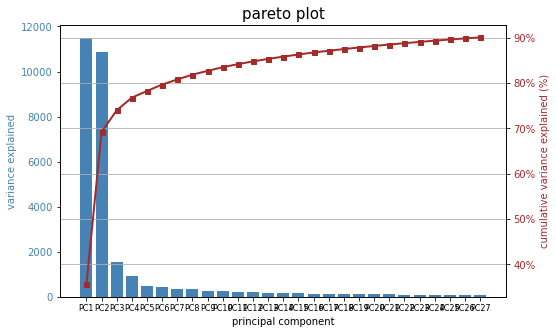

In [6]:
X_train_pca, X_test_pca, y_train, y_test = func.preprocess_data(
    X, y, 65536, standard="True", pca="True", n_pc=0.9, show_plot="True")

# modeling standardize data
把標準化後的資料建模 <br>

## MLR
多元羅吉斯回歸 (Multinomial Logistic Regression) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [7]:
# MLR model & hyperparametersmodel
mlr_opts = dict(multi_class='auto', tol=1e-6, max_iter=int(150), verbose=1)
mlr_model = LogisticRegression(**mlr_opts)
mlr_model.fit(X_train_scaled, y_train)
# predict
y_pred_mlr = mlr_model.predict(X_test_scaled)

In [11]:
# evaluation
mlr_eva = func.evaluate_model(y_test, y_pred_mlr)
# change to df
mlr_df = pd.DataFrame(list(mlr_eva.items()), columns=[
                      ["standard", "standard"], ["MLR", "MLR"], ['metric', 'value']])
mlr_df

standard      
         MLR      
      metric value
0   accuracy  0.98
1  precision  0.98
2     recall  0.98
3   F1-score  0.97

### grid search

In [44]:
# # search best parameter
# param_grid = {
#     'C': [0.5, 1],
#     'solver': ['newton-cg', 'lbfgs'],
#     'penalty': ['l1', 'l2']
# }

# # model
# mlr_opts = dict(multi_class='auto', tol=1e-6, max_iter=int(150), verbose=1)
# mlr_model = LogisticRegression(**mlr_opts)

# # grid search
# grid_search = GridSearchCV(mlr_model, param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# # print
# print("Best parameters found: ", grid_search.best_params_)

# # predict
# best_model = grid_search.best_estimator_
# y_pred_mlr_best = best_model.predict(X_test_scaled)


In [45]:
# # evaluation
# mlr_eva_best = func.evaluate_model(y_test, y_pred_mlr_best)
# # change to df
# mlr_df_best = pd.DataFrame(list(mlr_eva_best.items()), columns=[
#                       ["standard", "standard"], ["MLR", "MLR"], ['metric', 'value']])
# mlr_df_best

### MLR conclusion
可以發現 default 的效果就已經近乎完美 <br>
為了避免麻煩(運行時間過久 : > 30 min) <br>
因此使用 default 為最佳模型 <br>

## SVM
支援向量機 (Support Vector Machine) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [12]:
# SVM model & hyperparameter
svm_opts = dict(C=1, tol=1e-6, max_iter=int(1e6), verbose=1)
svm_model = SVC(kernel='linear', **svm_opts)
svm_model.fit(X_train_scaled, y_train)
# predict
y_pred_svm = svm_model.predict(X_test_scaled)

[LibSVM]

In [13]:
# evaluation
svm_eva = func.evaluate_model(y_test, y_pred_svm)
# change to df
svm_df = pd.DataFrame(list(svm_eva.items()), columns=[
                      ["standard", "standard"], ["SVM", "SVM"], ['metric', 'value']])
svm_df

standard      
         SVM      
      metric value
0   accuracy  0.94
1  precision  0.94
2     recall  0.94
3   F1-score  0.94

### grid search

In [ ]:
# # search best parameter
# param_grid = {
#     'C': [0.1, 1],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
# }

# # model
# svm_opts = dict(tol=1e-6, max_iter=int(1e6))
# svm_model = SVC(**svm_opts)

# # grid search
# grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# # print
# print("Best parameters found: ", grid_search.best_params_)

# # predict
# best_model = grid_search.best_estimator_
# y_pred_svm_best = best_model.predict(X_test_scaled)

In [ ]:
# # evaluation
# svm_eva_best = func.evaluate_model(y_test, y_pred_svm_best)
# # change to df
# svm_df_best = pd.DataFrame(list(svm_eva_best.items()), columns=[
#                       ["standard", "standard"], ["SVM", "SVM"], ['metric', 'value']])
# svm_df_best

### SVM conclusion
可以發現 default 的效果就已經還算不錯 <br>
為了避免麻煩(運行時間過久 : > 30 min) <br>
因此使用 default 為最佳模型 <br>

## NN--MLP
神經網路 (Neural Network) -- 多層感知機 (Multilayer perceptron) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [14]:
# NN-MLP model & hyperparameter
hidden_layers = (50, 100,120)
opts = dict(hidden_layer_sizes=hidden_layers, verbose=1,
            activation='relu', tol=1e-6, max_iter=int(1e6))
nn_mlp_model = MLPClassifier(solver='sgd', **opts)
nn_mlp_model.fit(X_train_scaled, y_train)
# predict
y_pred_nn_mlp = nn_mlp_model.predict(X_test_scaled)

Iteration 1, loss = 3.67098216
Iteration 2, loss = 3.52502260
Iteration 3, loss = 3.34179706
Iteration 4, loss = 3.13571983
Iteration 5, loss = 2.92585207
Iteration 6, loss = 2.72039130
Iteration 7, loss = 2.52689888
Iteration 8, loss = 2.34292591
Iteration 9, loss = 2.16556291
Iteration 10, loss = 2.00070370
Iteration 11, loss = 1.85052644
Iteration 12, loss = 1.71119978
Iteration 13, loss = 1.58328276
Iteration 14, loss = 1.46885046
Iteration 15, loss = 1.36395925
Iteration 16, loss = 1.26749571
Iteration 17, loss = 1.17914078
Iteration 18, loss = 1.09276264
Iteration 19, loss = 1.00920745
Iteration 20, loss = 0.93529511
Iteration 21, loss = 0.86205718
Iteration 22, loss = 0.79306246
Iteration 23, loss = 0.73397272
Iteration 24, loss = 0.68184504
Iteration 25, loss = 0.63086239
Iteration 26, loss = 0.58285416
Iteration 27, loss = 0.54054672
Iteration 28, loss = 0.50000067
Iteration 29, loss = 0.46471340
Iteration 30, loss = 0.43516379
Iteration 31, loss = 0.40513854
Iteration 32, los

Iteration 253, loss = 0.01848203
Iteration 254, loss = 0.01819954
Iteration 255, loss = 0.01909024
Iteration 256, loss = 0.01896054
Iteration 257, loss = 0.01838679
Iteration 258, loss = 0.01851649
Iteration 259, loss = 0.01783185
Iteration 260, loss = 0.01910626
Iteration 261, loss = 0.01822278
Iteration 262, loss = 0.01808195
Iteration 263, loss = 0.01853680
Iteration 264, loss = 0.01848976
Iteration 265, loss = 0.01771745
Iteration 266, loss = 0.01802820
Iteration 267, loss = 0.01769520
Iteration 268, loss = 0.01791991
Iteration 269, loss = 0.01856461
Iteration 270, loss = 0.01830077
Iteration 271, loss = 0.01810378
Iteration 272, loss = 0.01794715
Iteration 273, loss = 0.01835765
Iteration 274, loss = 0.01752665
Iteration 275, loss = 0.01802528
Iteration 276, loss = 0.01771196
Iteration 277, loss = 0.01746892
Iteration 278, loss = 0.01793487
Iteration 279, loss = 0.01841908
Iteration 280, loss = 0.01718598
Iteration 281, loss = 0.01717274
Iteration 282, loss = 0.01649874
Iteration 

In [15]:
# evaluation
nn_mlp_eva = func.evaluate_model(y_test, y_pred_nn_mlp)
# change to df
nn_mlp_df = pd.DataFrame(list(nn_mlp_eva.items()), columns=[
                         ["standard", "standard"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
nn_mlp_df

standard      
      NN_MLP      
      metric value
0   accuracy  0.96
1  precision  0.96
2     recall  0.96
3   F1-score  0.96

### grid search

In [ ]:
# # search best parameter
# param_grid = {
#     'hidden_layer_sizes': [(50, 100)],
#     'activation': ['logistic', 'relu'],
#     'solver': ['lbfgs', 'sgd', 'adam'],
# }

# # model
# opts = dict(verbose=1, tol=1e-6, max_iter=int(1e6))
# nn_mlp_model = MLPClassifier(**opts)

# # grid search
# grid_search = GridSearchCV(nn_mlp_model, param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# # print
# print("Best parameters found: ", grid_search.best_params_)

# # predict
# best_model = grid_search.best_estimator_
# y_pred_nn_mlp_best = best_model.predict(X_test_scaled)

In [ ]:
# # evaluation
# nn_mlp_eva_best = func.evaluate_model(y_test, y_pred_nn_mlp_best)
# # change to df
# nn_mlp_df_best = pd.DataFrame(list(nn_mlp_eva_best.items()), columns=[
#                          ["standard", "standard"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
# nn_mlp_df_best

### NN--MLP conclusion
可以發現 default 的效果就已經還算不錯 <br>
為了避免麻煩(運行時間過久 : > 30 min) <br>
因此使用 default 為最佳模型 <br>

## NN--SEQ
神經網路 (Neural Network) -- 簡單的線性堆疊模型 <br>
一層一層的建立神經網路 <br>
接著列出現在構建的網路長甚麼樣子 <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

In [16]:
# change 1~3 to 0~2
y_train_nn = y_train-1
y_test_nn = y_test-1

# model
nn_seq_model = Sequential()
nn_seq_model.add(Dense(64, activation='relu',
                 input_shape=(X_train_scaled.shape[1],)))
nn_seq_model.add(Dense(40, activation='relu'))
nn_seq_model.add(Dropout(0.2))
nn_seq_model.add(Dense(32, activation='relu'))
# avoid overfitting
# nn_seq_model.add(Dropout(0.2))
nn_seq_model.add(Dense(38, activation='softmax'))

# compile
# set learning rate
optimizer = Adam(learning_rate=0.001)
nn_seq_model.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# check model
nn_seq_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2064448   
                                                                 
 dense_1 (Dense)             (None, 40)                2600      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1312      
                                                                 
 dense_3 (Dense)             (None, 38)                1254      
                                                                 
Total params: 2069614 (7.89 MB)
Trainable params: 2069614 (7.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# fit model
history = nn_seq_model.fit(X_train_scaled, y_train_nn,
                           epochs=150, validation_split=0.2, verbose=1)

Epoch 1/150


49/49 [==============================] - 3s 28ms/step - loss: 7.8221 - accuracy: 0.0435 - val_loss: 4.3615 - val_accuracy: 0.0337
Epoch 2/150
49/49 [==============================] - 1s 25ms/step - loss: 4.1213 - accuracy: 0.0837 - val_loss: 3.4937 - val_accuracy: 0.0881
Epoch 3/150
49/49 [==============================] - 1s 25ms/step - loss: 3.6060 - accuracy: 0.1109 - val_loss: 3.2617 - val_accuracy: 0.1218
Epoch 4/150
49/49 [==============================] - 1s 24ms/step - loss: 3.1927 - accuracy: 0.1654 - val_loss: 2.8971 - val_accuracy: 0.1788
Epoch 5/150
49/49 [==============================] - 1s 24ms/step - loss: 2.9328 - accuracy: 0.2082 - val_loss: 2.7631 - val_accuracy: 0.2150
Epoch 6/150
49/49 [==============================] - 1s 23ms/step - loss: 2.7601 - accuracy: 0.2458 - val_loss: 2.6367 - val_accuracy: 0.3057
Epoch 7/150
49/49 [==============================] - 1s 23ms/step - loss: 2.5217 - accuracy: 0.3139 - val_loss: 2.3978 - val_accuracy: 0.3497
Epoc

49/49 [==============================] - 1s 21ms/step - loss: 0.6896 - accuracy: 0.8003 - val_loss: 0.7062 - val_accuracy: 0.8394
Epoch 56/150
49/49 [==============================] - 1s 21ms/step - loss: 0.6504 - accuracy: 0.8093 - val_loss: 0.5606 - val_accuracy: 0.8472
Epoch 57/150
49/49 [==============================] - 1s 21ms/step - loss: 0.5877 - accuracy: 0.8333 - val_loss: 0.5394 - val_accuracy: 0.8679
Epoch 58/150
49/49 [==============================] - 1s 20ms/step - loss: 0.5996 - accuracy: 0.8204 - val_loss: 0.4624 - val_accuracy: 0.8808
Epoch 59/150
49/49 [==============================] - 1s 21ms/step - loss: 0.6554 - accuracy: 0.8113 - val_loss: 0.5697 - val_accuracy: 0.8575
Epoch 60/150
49/49 [==============================] - 1s 20ms/step - loss: 0.5447 - accuracy: 0.8411 - val_loss: 0.5064 - val_accuracy: 0.8679
Epoch 61/150
49/49 [==============================] - 1s 21ms/step - loss: 0.5696 - accuracy: 0.8256 - val_loss: 0.3584 - val_accuracy: 0.8886
Epoch 62/150

49/49 [==============================] - 1s 26ms/step - loss: 0.2519 - accuracy: 0.9215 - val_loss: 0.2360 - val_accuracy: 0.9197
Epoch 113/150
49/49 [==============================] - 1s 25ms/step - loss: 0.2797 - accuracy: 0.9157 - val_loss: 0.2373 - val_accuracy: 0.9301
Epoch 114/150
49/49 [==============================] - 1s 24ms/step - loss: 0.2979 - accuracy: 0.9073 - val_loss: 0.2304 - val_accuracy: 0.9249
Epoch 115/150
49/49 [==============================] - 1s 23ms/step - loss: 0.2718 - accuracy: 0.9228 - val_loss: 0.3433 - val_accuracy: 0.9093
Epoch 116/150
49/49 [==============================] - 1s 24ms/step - loss: 0.2891 - accuracy: 0.9215 - val_loss: 0.3894 - val_accuracy: 0.8964
Epoch 117/150
49/49 [==============================] - 1s 26ms/step - loss: 0.3433 - accuracy: 0.9040 - val_loss: 0.3026 - val_accuracy: 0.9197
Epoch 118/150
49/49 [==============================] - 1s 22ms/step - loss: 0.2798 - accuracy: 0.9170 - val_loss: 0.2601 - val_accuracy: 0.9301
Epoch 

In [18]:
# evaluation
test_loss, test_accuracy = nn_seq_model.evaluate(
    X_test_scaled, y_test_nn, verbose=0)
y_pred_prob = nn_seq_model.predict(X_test_scaled, verbose=0)
y_pred_nn_seq = np.argmax(y_pred_prob, axis=1)
print("loss :", test_loss)
print("accuracy :", test_accuracy)

loss : 0.385423868894577
accuracy : 0.9066389799118042


In [19]:
# evaluation
nn_seq_eva = func.evaluate_model(y_test_nn, y_pred_nn_seq)
# change to df
nn_seq_df = pd.DataFrame(list(nn_seq_eva.items()), columns=[
                         ["standard", "standard"], ["NN_SEQ", "NN_SEQ"], ['metric', 'value']])
nn_seq_df

standard      
      NN_SEQ      
      metric value
0   accuracy  0.91
1  precision  0.92
2     recall  0.91
3   F1-score  0.91

## compare evaluation of standardize data
把上述所有的評估指標組合一起觀察 <br>

In [20]:
# combine df together
mlr_df_copy = mlr_df.copy()
svm_df_copy = svm_df.copy()
nn_mlp_df_copy = nn_mlp_df.copy()
nn_seq_df_copy = nn_seq_df.copy()
# del same col
svm_df_copy.drop(("standard", "SVM", "metric"), axis=1, inplace=True)
nn_mlp_df_copy.drop(("standard", "NN_MLP", "metric"), axis=1, inplace=True)
nn_seq_df_copy.drop(("standard", "NN_SEQ", "metric"), axis=1, inplace=True)

# combine
final_df_standard = pd.concat(
    [mlr_df_copy, svm_df_copy, nn_mlp_df_copy, nn_seq_df_copy], axis=1)
# set "metric" to index
final_df_standard.set_index(("standard", "MLR", "metric"), inplace=True)
final_df_standard = final_df_standard.rename_axis("metric")

# show
final_df_standard

standard                    
               MLR   SVM NN_MLP NN_SEQ
             value value  value  value
metric                                
accuracy      0.98  0.94   0.96   0.91
precision     0.98  0.94   0.96   0.92
recall        0.98  0.94   0.96   0.91
F1-score      0.97  0.94   0.96   0.91

## model of standardize data conclusion
可以看出總體來說 MLR 模型的表現是最好的 <br>

# modeling pca data
把 PCA 後的資料建模 <br>

## MLR
多元羅吉斯回歸 (Multinomial Logistic Regression) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [23]:
# MLR model & hyperparametersmodel
mlr_opts = dict(multi_class='auto',C = 0.1, tol=1e-6, max_iter=int(1e6), verbose=1)
mlr_model = LogisticRegression(**mlr_opts)
mlr_model.fit(X_train_pca, y_train)
# predict
y_pred_mlr = mlr_model.predict(X_test_pca)

In [24]:
# evaluation
mlr_eva = func.evaluate_model(y_test, y_pred_mlr)
# change to df
mlr_df = pd.DataFrame(list(mlr_eva.items()), columns=[
                      ["PCA", "PCA"], ["MLR", "MLR"], ['metric', 'value']])
mlr_df

PCA      
         MLR      
      metric value
0   accuracy  0.88
1  precision  0.89
2     recall  0.88
3   F1-score  0.88

### grid search

In [25]:
# search best parameter
param_grid = {
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

# model
mlr_opts = dict(multi_class='auto', tol=1e-6, max_iter=int(1e6), verbose=1)
mlr_model = LogisticRegression(**mlr_opts)

# grid search
grid_search = GridSearchCV(mlr_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_mlr_best = best_model.predict(X_test_pca)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [26]:
# evaluation
mlr_eva_best = func.evaluate_model(y_test, y_pred_mlr_best)
# change to df
mlr_df_best = pd.DataFrame(list(mlr_eva_best.items()), columns=[
                      ["PCA", "PCA"], ["MLR", "MLR"], ['metric', 'value']])
mlr_df_best

PCA      
         MLR      
      metric value
0   accuracy  0.88
1  precision  0.89
2     recall  0.88
3   F1-score  0.88

### MLR conclusion
可以發現 2個的結果相同 <br>
為了避免麻煩 <br>
因此使用 default 為最佳模型 <br>

## SVM
支援向量機 (Support Vector Machine) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [29]:
# SVM model & hyperparameter
svm_opts = dict(C=1, tol=1e-6, max_iter=int(1e6))
svm_model = SVC(kernel='linear', **svm_opts)
svm_model.fit(X_train_pca, y_train)
# predict
y_pred_svm = svm_model.predict(X_test_pca)

In [30]:
# evaluation
svm_eva = func.evaluate_model(y_test, y_pred_svm)
# change to df
svm_df = pd.DataFrame(list(svm_eva.items()), columns=[
                      ["PCA", "PCA"], ["SVM", "SVM"], ['metric', 'value']])
svm_df

PCA      
         SVM      
      metric value
0   accuracy  0.89
1  precision  0.90
2     recall  0.89
3   F1-score  0.89

### grid search

In [31]:
# search best parameter
param_grid = {
    'C': [0.05, 0.08, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

# model
svm_opts = dict(tol=1e-6, max_iter=int(1e6))
svm_model = SVC(**svm_opts)

# grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_svm_best = best_model.predict(X_test_pca)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 0.05, 'gamma': 'scale', 'kernel': 'linear'}


In [32]:
# evaluation
svm_eva_best = func.evaluate_model(y_test, y_pred_svm_best)
# change to df
svm_df_best = pd.DataFrame(list(svm_eva_best.items()), columns=[
                      ["PCA", "PCA"], ["SVM", "SVM"], ['metric', 'value']])
svm_df_best

PCA      
         SVM      
      metric value
0   accuracy  0.90
1  precision  0.91
2     recall  0.90
3   F1-score  0.90

### SVM conclusion
可以發現 best 的結果就已經是最好的 <br>
因此使用 best 為最佳模型 <br>

## NN--MLP
神經網路 (Neural Network) -- 多層感知機 (Multilayer perceptron) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [33]:
# NN-MLP model & hyperparameter
hidden_layers = (50, 100,120)
opts = dict(hidden_layer_sizes=hidden_layers, verbose=1,
            activation='relu', tol=1e-6, max_iter=int(1e6))
nn_mlp_model = MLPClassifier(solver='adam', **opts)
nn_mlp_model.fit(X_train_pca, y_train)
# predict
y_pred_nn_mlp = nn_mlp_model.predict(X_test_pca)

Iteration 1, loss = 12.16149277
Iteration 2, loss = 6.17901377
Iteration 3, loss = 4.39708449
Iteration 4, loss = 3.46573837
Iteration 5, loss = 2.92055004
Iteration 6, loss = 2.51078475
Iteration 7, loss = 2.19753477
Iteration 8, loss = 1.93325700
Iteration 9, loss = 1.70736621
Iteration 10, loss = 1.51792539
Iteration 11, loss = 1.35127812
Iteration 12, loss = 1.21933759
Iteration 13, loss = 1.09234195
Iteration 14, loss = 0.98303504
Iteration 15, loss = 0.89586792
Iteration 16, loss = 0.81347210
Iteration 17, loss = 0.75346302
Iteration 18, loss = 0.68941466
Iteration 19, loss = 0.63371682
Iteration 20, loss = 0.57687211
Iteration 21, loss = 0.53703192
Iteration 22, loss = 0.49643657
Iteration 23, loss = 0.46496089
Iteration 24, loss = 0.42824359
Iteration 25, loss = 0.40637853
Iteration 26, loss = 0.38301566
Iteration 27, loss = 0.35493325
Iteration 28, loss = 0.33589812
Iteration 29, loss = 0.31847786
Iteration 30, loss = 0.29794830
Iteration 31, loss = 0.28961391
Iteration 32, lo

In [34]:
# evaluation
nn_mlp_eva = func.evaluate_model(y_test, y_pred_nn_mlp)
# change to df
nn_mlp_df = pd.DataFrame(list(nn_mlp_eva.items()), columns=[
                         ["PCA", "PCA"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
nn_mlp_df

PCA      
      NN_MLP      
      metric value
0   accuracy  0.87
1  precision  0.88
2     recall  0.87
3   F1-score  0.87

### grid search

In [36]:
# search best parameter
param_grid = {
    'hidden_layer_sizes': [(50, 100,120)],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

# model
opts = dict(verbose=1, tol=1e-6, max_iter=int(1e5))
nn_mlp_model = MLPClassifier(**opts)

# grid search
grid_search = GridSearchCV(nn_mlp_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_nn_mlp_best = best_model.predict(X_test_pca)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 120), 'solver': 'lbfgs'}


In [37]:
# evaluation
nn_mlp_eva_best = func.evaluate_model(y_test, y_pred_nn_mlp_best)
# change to df
nn_mlp_df_best = pd.DataFrame(list(nn_mlp_eva_best.items()), columns=[
                         ["PCA", "PCA"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
nn_mlp_df_best

PCA      
      NN_MLP      
      metric value
0   accuracy  0.88
1  precision  0.89
2     recall  0.88
3   F1-score  0.88

### NN--MLP conclusion
可以發現 best 的結果就已經是最好的 <br>
因此使用 best 為最佳模型 <br>

## NN--SEQ

In [38]:
# change 1~3 to 0~2
y_train_nn = y_train-1
y_test_nn = y_test-1

# model
nn_seq_model = Sequential()
nn_seq_model.add(Dense(64, activation='relu',
                 input_shape=(X_train_pca.shape[1],)))
nn_seq_model.add(Dense(32, activation='relu'))
# avoid overfitting
nn_seq_model.add(Dropout(0.2))
nn_seq_model.add(Dense(38, activation='softmax'))

# compile
# set learning rate
optimizer = Adam(learning_rate=0.001)
nn_seq_model.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# check model
nn_seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1792      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 38)                1254      
                                                                 
Total params: 5126 (20.02 KB)
Trainable params: 5126 (20.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# fit model
history = nn_seq_model.fit(X_train_pca, y_train_nn,
                           epochs=250, validation_split=0.2, verbose=1)

Epoch 1/250
49/49 [==============================] - 1s 8ms/step - loss: 14.2374 - accuracy: 0.0363 - val_loss: 5.4154 - val_accuracy: 0.0492
Epoch 2/250
49/49 [==============================] - 0s 3ms/step - loss: 4.4999 - accuracy: 0.0506 - val_loss: 3.6294 - val_accuracy: 0.0570
Epoch 3/250
49/49 [==============================] - 0s 3ms/step - loss: 3.5542 - accuracy: 0.0700 - val_loss: 3.4116 - val_accuracy: 0.0881
Epoch 4/250
49/49 [==============================] - 0s 4ms/step - loss: 3.3706 - accuracy: 0.1012 - val_loss: 3.2733 - val_accuracy: 0.1347
Epoch 5/250
49/49 [==============================] - 0s 4ms/step - loss: 3.2378 - accuracy: 0.1310 - val_loss: 3.1704 - val_accuracy: 0.1503
Epoch 6/250
49/49 [==============================] - 0s 4ms/step - loss: 3.1372 - accuracy: 0.1414 - val_loss: 3.0763 - val_accuracy: 0.1710
Epoch 7/250
49/49 [==============================] - 0s 5ms/step - loss: 3.0009 - accuracy: 0.1894 - val_loss: 2.9549 - val_accuracy: 0.2124
Epoch 8/250


Epoch 59/250
49/49 [==============================] - 0s 3ms/step - loss: 0.4932 - accuracy: 0.8521 - val_loss: 0.7099 - val_accuracy: 0.8005
Epoch 60/250
49/49 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.8586 - val_loss: 0.6707 - val_accuracy: 0.8187
Epoch 61/250
49/49 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8528 - val_loss: 0.6805 - val_accuracy: 0.8083
Epoch 62/250
49/49 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8528 - val_loss: 0.6609 - val_accuracy: 0.8187
Epoch 63/250
49/49 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.8638 - val_loss: 0.6882 - val_accuracy: 0.8187
Epoch 64/250
49/49 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8489 - val_loss: 0.6711 - val_accuracy: 0.8109
Epoch 65/250
49/49 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8528 - val_loss: 0.6862 - val_accuracy: 0.8238
Epoch 

49/49 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9150 - val_loss: 0.6813 - val_accuracy: 0.8679
Epoch 117/250
49/49 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9222 - val_loss: 0.6629 - val_accuracy: 0.8575
Epoch 118/250
49/49 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9261 - val_loss: 0.5845 - val_accuracy: 0.8679
Epoch 119/250
49/49 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.9339 - val_loss: 0.6100 - val_accuracy: 0.8731
Epoch 120/250
49/49 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9280 - val_loss: 0.5576 - val_accuracy: 0.8601
Epoch 121/250
49/49 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9293 - val_loss: 0.5995 - val_accuracy: 0.8756
Epoch 122/250
49/49 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9235 - val_loss: 0.6126 - val_accuracy: 0.8705
Epoch 123/250

49/49 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9455 - val_loss: 0.5604 - val_accuracy: 0.8834
Epoch 174/250
49/49 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9475 - val_loss: 0.5777 - val_accuracy: 0.8860
Epoch 175/250
49/49 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9455 - val_loss: 0.4709 - val_accuracy: 0.8886
Epoch 176/250
49/49 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9501 - val_loss: 0.4910 - val_accuracy: 0.8886
Epoch 177/250
49/49 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.9449 - val_loss: 0.5165 - val_accuracy: 0.8938
Epoch 178/250
49/49 [==============================] - 0s 3ms/step - loss: 0.1441 - accuracy: 0.9507 - val_loss: 0.5041 - val_accuracy: 0.8938
Epoch 179/250
49/49 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.9494 - val_loss: 0.5320 - val_accuracy: 0.9016
Epoch 180/250

49/49 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9553 - val_loss: 0.5628 - val_accuracy: 0.8964
Epoch 231/250
49/49 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9442 - val_loss: 0.5046 - val_accuracy: 0.9093
Epoch 232/250
49/49 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9540 - val_loss: 0.5623 - val_accuracy: 0.9016
Epoch 233/250
49/49 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9481 - val_loss: 0.6242 - val_accuracy: 0.8912
Epoch 234/250
49/49 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9572 - val_loss: 0.5455 - val_accuracy: 0.9067
Epoch 235/250
49/49 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9617 - val_loss: 0.5361 - val_accuracy: 0.8964
Epoch 236/250
49/49 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9624 - val_loss: 0.5900 - val_accuracy: 0.8938
Epoch 237/250

In [40]:
# evaluation
test_loss, test_accuracy = nn_seq_model.evaluate(
    X_test_pca, y_test_nn, verbose=0)
y_pred_prob = nn_seq_model.predict(X_test_pca, verbose=0)
y_pred_nn_seq = np.argmax(y_pred_prob, axis=1)
print("loss :", test_loss)
print("accuracy :", test_accuracy)

loss : 0.5134116411209106
accuracy : 0.8962655663490295


In [41]:
# evaluation
nn_seq_eva = func.evaluate_model(y_test_nn, y_pred_nn_seq)
# change to df
nn_seq_df = pd.DataFrame(list(nn_seq_eva.items()), columns=[
                         ["PCA", "PCA"], ["NN_SEQ", "NN_SEQ"], ['metric', 'value']])
nn_seq_df

PCA      
      NN_SEQ      
      metric value
0   accuracy   0.9
1  precision   0.9
2     recall   0.9
3   F1-score   0.9

## compare evaluation of pca data

In [42]:
# combine df together
mlr_df_copy = mlr_df.copy()
svm_df_best_copy = svm_df_best.copy()
nn_mlp_df_copy = nn_mlp_df.copy()
nn_seq_df_copy = nn_seq_df.copy()
# del same col
svm_df_best_copy.drop(("PCA", "SVM", "metric"), axis=1, inplace=True)
nn_mlp_df_copy.drop(("PCA", "NN_MLP", "metric"), axis=1, inplace=True)
nn_seq_df_copy.drop(("PCA", "NN_SEQ", "metric"), axis=1, inplace=True)

# combine
final_df_pca = pd.concat(
    [mlr_df_copy, svm_df_best_copy, nn_mlp_df_copy, nn_seq_df_copy], axis=1)
# set "metric" to index
final_df_pca.set_index(("PCA", "MLR", "metric"), inplace=True)
final_df_pca = final_df_pca.rename_axis("metric")

# show
final_df_pca

PCA                    
            MLR   SVM NN_MLP NN_SEQ
          value value  value  value
metric                             
accuracy   0.88  0.90   0.87    0.9
precision  0.89  0.91   0.88    0.9
recall     0.88  0.90   0.87    0.9
F1-score   0.88  0.90   0.87    0.9

## model of pca data conclusion
可以看出總體來說 SVM、NN_SEQ 模型的表現是最好的 <br>
雖然得到的分數與剩下的沒有差距太大 <br>
不過他們所運行時間並不會太長 <br>

# final conclusion
把上述所有的評估指標組合一起觀察 <br>

In [43]:
final_df = pd.concat(
    [final_df_standard, final_df_pca], axis=1)
final_df

standard                       PCA                    
               MLR   SVM NN_MLP NN_SEQ   MLR   SVM NN_MLP NN_SEQ
             value value  value  value value value  value  value
metric                                                          
accuracy      0.98  0.94   0.96   0.91  0.88  0.90   0.87    0.9
precision     0.98  0.94   0.96   0.92  0.89  0.91   0.88    0.9
recall        0.98  0.94   0.96   0.91  0.88  0.90   0.87    0.9
F1-score      0.97  0.94   0.96   0.91  0.88  0.90   0.87    0.9

可以發現到其實資料集進行標準化得到的評估指標相較於 PCA 優異了一點 <br>
有可能是因為 PCA 時把一些特徵忽略掉所導致的 <br>
但如果以運行時間來觀察的話 <br>
能夠發現經過 PCA 後的資料在 fit 模型時花費的時間比較短 <br>